# Simple Linear Regression-Q1

## Predict delivery time using sorting time

### Step-1 : Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings as warnings
warnings.filterwarnings("ignore")
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

### Step-2 : Descriptive analysis

### Step-2.1 : Working with Dataset

#### Loading the Dataset

In [2]:
# Deliver time with respect to sorting time
dt_st = pd.read_csv("delivery_time.csv")

#### Exploring the dataset

In [3]:
# Displaying first ten records
dt_st.head(10)

,Deliver Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
# Shape of the data
dt_st.shape

(21, 2)

In [5]:
# Summary of the data
dt_st.describe()

,Deliver Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [6]:
# Check the data types
dt_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Deliver Time  21 non-null     float64
 1   Sorting Time  21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


#### Modifying the dataset

In [7]:
dt_st=dt_st.rename(columns={'Deliver Time':'Deliver_Time','Sorting Time':'Sorting_Time'})
dt_st.head(10)

,Deliver_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


### Step-2.2 : Handling missing values

In [8]:
# Check for Null values
dt_st.isnull().sum()

Deliver_Time    0
Sorting_Time    0
dtype: int64

In [9]:
# Check for duplicate values
dt_st[dt_st.duplicated()].shape

(0, 2)

In [10]:
dt_st[dt_st.duplicated()]

,Deliver_Time,Sorting_Time


In [11]:
# Change the data type to float
dt_st=dt_st.astype(float)
dt_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Deliver_Time  21 non-null     float64
 1   Sorting_Time  21 non-null     float64
dtypes: float64(2)
memory usage: 464.0 bytes


### Step-2.3 : Exploring data using Visualisation

#### Histogram

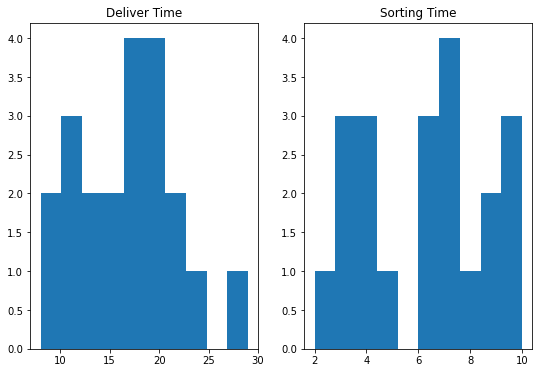

In [12]:
plt.subplots(figsize = (9,6))
plt.subplot(1,2,1)
plt.hist(dt_st['Deliver_Time'])
plt.title('Deliver Time')
plt.subplot(1,2,2)
plt.hist(dt_st['Sorting_Time'])
plt.title('Sorting Time')
plt.show()

#### Boxplot

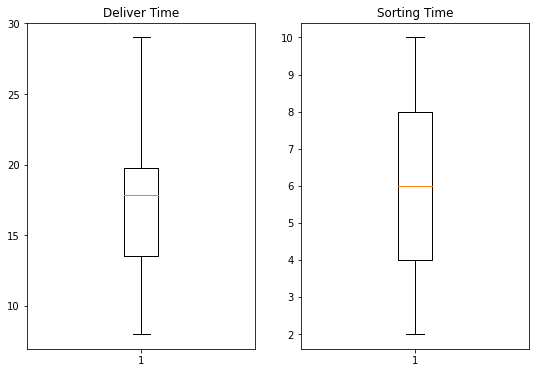

In [13]:
plt.subplots(figsize = (9,6))
plt.subplot(1,2,1)
plt.boxplot(dt_st['Deliver_Time'])
plt.title('Deliver Time')
plt.subplot(1,2,2)
plt.boxplot(dt_st['Sorting_Time'])
plt.title('Sorting Time')
plt.show()

#### Distribution plot

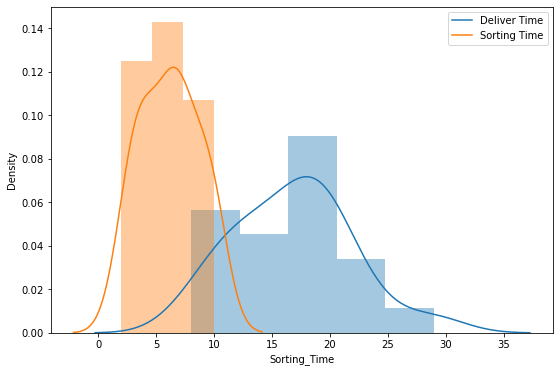

In [14]:
plt.figure(figsize = (9,6))
labels = ['Deliver Time', 'Sorting Time']
sb.distplot(dt_st['Deliver_Time'])
sb.distplot(dt_st['Sorting_Time'])
plt.legend(labels)
plt.show()

#### Q-Q plot

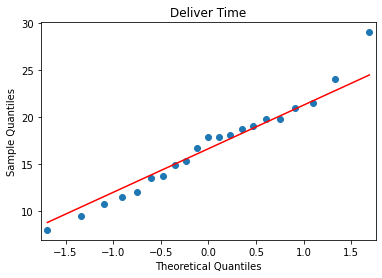

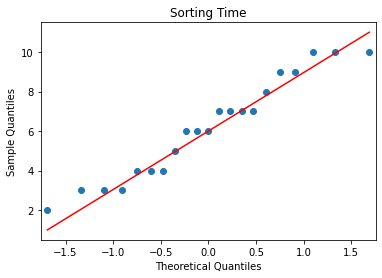

In [15]:
# To check whether the data is following normal distribution
sm.qqplot(dt_st['Deliver_Time'], line = 'q')
plt.title('Deliver Time')
sm.qqplot(dt_st['Sorting_Time'], line = 'q')
plt.title('Sorting Time')
plt.show()

#### Correlation and Heat map

In [16]:
# Checking for Correlation between variables
dt_st.corr()

,Deliver_Time,Sorting_Time
Deliver_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


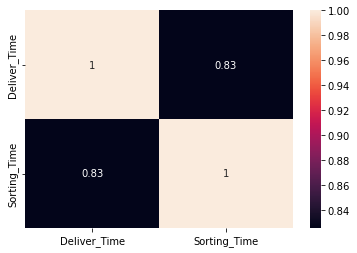

In [17]:
sb.heatmap(dt_st.corr(),annot=True)
plt.show()

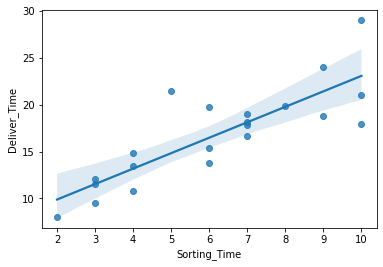

In [18]:
sb.regplot(x=dt_st['Sorting_Time'],y=dt_st['Deliver_Time'])
plt.show()

In [19]:
# There is a good correlation between two variables.
# The correlation value is more than 0.8 which represents that the variables are strongly related.

### Step-3 : Build a Simple Linear Regeression model

### Step-3.1 : Fitting the model

In [20]:
# The Simple Linear regression equation is dt=βo+β1(st).
# Using the following code we build a Simple linear regression model, which predicts the deliver time for given sorting time
model=smf.ols("Deliver_Time~Sorting_Time",data=dt_st).fit()

#### Printing Estimated Parameters

In [21]:
# We get values of βo,β1
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

### Step-4 : Model Diagnostics

#### Residuals

In [22]:
# Residuals or errors of the model for each observation. Error = Actual value - Predicted value
model.resid

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

In [23]:
# Standardised residuals
model.resid_pearson

array([-0.70630355,  0.10943679,  1.11524837,  0.87774154,  2.01950985,
       -0.383949  ,  0.2978383 , -0.69160484, -1.76255624, -0.9110735 ,
        0.01877637, -0.82756157, -0.49264758, -0.0101515 ,  0.17043364,
        0.5796396 , -0.92911167, -0.00540844, -0.64082979, -0.10081191,
        2.27338512])

#### Predicted values

In [24]:
pred=model.predict(dt_st)
pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

#### Scatter plot

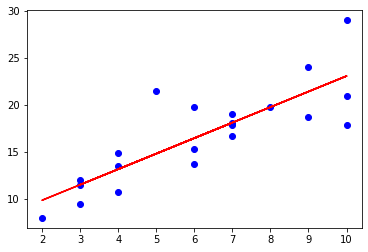

In [25]:
# Scatter plot between Sorting Time-Deliver Time & Sorting Time-Predicted Deliver Time
plt.scatter(dt_st.Sorting_Time,dt_st.Deliver_Time,c="b")
plt.plot(dt_st.Sorting_Time,pred,"r")
plt.show()

#### Overall Summary

In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Deliver_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 14 Feb 2023   Prob (F-statistic):           3.98e-06
Time:                        20:57:13   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Root Mean Square Error(RMSE)

In [27]:
rmse = np.sqrt(np.mean(model.resid**2))
rmse

2.7916503270617654

#### From the Summary, we can see that the R² value is less. So the accuracy of the model is low.
#### The Root Mean Square Error value is high.
#### So in order to improve the accuracy of the model and decrease the RMSE value, apply transformations.

### Step-5 : Apply Transformations to the model

### Step-5.1 : Logarithmic Transformation

In [28]:
# The logarithmic transformation Simple linear regression model equation is dt=βo+β1(log(st)).
model_1 = smf.ols("Deliver_Time~np.log(Sorting_Time)", data=dt_st).fit()

In [29]:
pred_1 = model_1.predict(dt_st)
pred_1

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

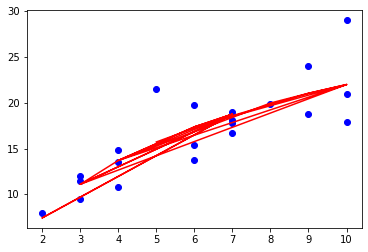

In [30]:
plt.scatter(dt_st.Sorting_Time,dt_st.Deliver_Time,c="b")
plt.plot(dt_st.Sorting_Time,pred_1,"r")
plt.show()

In [31]:
# Overall Summary
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Deliver_Time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Tue, 14 Feb 2023   Prob (F-statistic):           2.64e-06
Time:                        20:57:14   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(Sorting_Time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
# Root Mean Square Error(RMSE)
rmse_1 = np.sqrt(np.mean(model_1.resid**2))
rmse_1

2.733171476682066

#### The R² value is improved and the RMSE value decreased.
#### However all the transformations have to applied and the model with best R² value and low RMSE is to be choosen.

### Step-5.2 : Exponential Transformation

In [33]:
# The Exponential transformation Simple linear regression model equation is log(dt)=βo+β1(st).
model_2 = smf.ols("np.log(Deliver_Time)~Sorting_Time", data=dt_st).fit()

In [34]:
# Convert predicted log values into predicted values
pred_2log = model_2.predict(dt_st)
pred_2 = np.exp(pred_2log)
pred_2

0     23.972032
1     12.725123
2     15.716034
3     21.570707
4     23.972032
5     15.716034
6     17.465597
7     11.450423
8     23.972032
9     21.570707
10    19.409927
11    12.725123
12    17.465597
13    11.450423
14    11.450423
15    12.725123
16    15.716034
17    17.465597
18    10.303411
19    17.465597
20    14.141728
dtype: float64

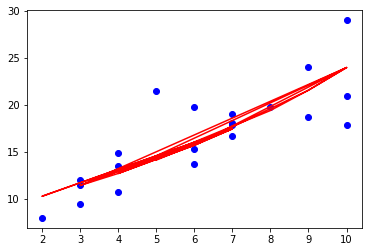

In [35]:
plt.scatter(dt_st.Sorting_Time,dt_st.Deliver_Time,c="b")
plt.plot(dt_st.Sorting_Time,pred_2,"r")
plt.show()

In [36]:
# Overall Summary
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(Deliver_Time)   R-squared:                       0.711
Model:                              OLS   Adj. R-squared:                  0.696
Method:                   Least Squares   F-statistic:                     46.73
Date:                  Tue, 14 Feb 2023   Prob (F-statistic):           1.59e-06
Time:                          20:57:14   Log-Likelihood:                 7.7920
No. Observations:                    21   AIC:                            -11.58
Df Residuals:                        19   BIC:                            -9.495
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
Sorting_Time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
# Root Mean Square Error(RMSE)
rmse_2 = np.sqrt(np.mean((dt_st.Deliver_Time-pred_2)**2))
rmse_2

2.940250323056201

#### The R² value is improved, but the RMSE value increased.

### Step-5.3 : Quadratic transformation

In [38]:
model_3 = smf.ols("Deliver_Time~Sorting_Time+np.power(Sorting_Time,2)",data=dt_st).fit()

In [39]:
# Convert predicted log values into predicted values
pred_3log = model_3.predict(dt_st)
pred_3 = np.exp(pred_3log)
dt_st['pred']=pred_3
dt_st

,Deliver_Time,Sorting_Time,pred
0,21.00,10.0,4.998629e+09
1,13.50,4.0,5.871697e+05
2,19.75,6.0,2.526949e+07
3,24.00,9.0,1.762843e+09
4,29.00,10.0,4.998629e+09
5,15.35,6.0,2.526949e+07
6,19.00,7.0,1.253391e+08
7,9.50,3.0,6.767384e+04
8,17.90,10.0,4.998629e+09
9,18.75,9.0,1.762843e+09


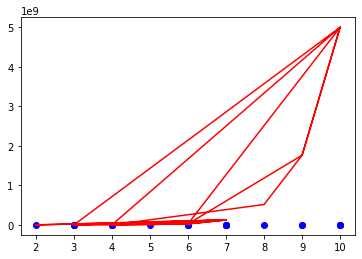

In [40]:
plt.scatter(dt_st.Sorting_Time,dt_st.Deliver_Time,c="b")
plt.plot(dt_st.Sorting_Time,pred_3,"r")
plt.show()

In [41]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Deliver_Time   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     20.36
Date:                Tue, 14 Feb 2023   Prob (F-statistic):           2.39e-05
Time:                        20:57:14   Log-Likelihood:                -50.981
No. Observations:                  21   AIC:                             108.0
Df Residuals:                      18   BIC:                             111.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     3.5222      4.160      0.847      0.408      -5.217      12.261
Sorting_Time                  2.8130      1.461      1.926      0.070      -0.256       5.882
np.power(Sorting_Time, 2)    -0.0932      0.115     -0.810      0.429      -0.335       0.149
==============================================================================
Omnibus:                        5.388   Durbin-Watson:                   1.345
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                3.393
Skew:                           0.943   Prob(JB):                        0.183
Kurtosis:                       3.563   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
# Root Mean Square Error(RMSE)
rmse_3 = np.sqrt(np.mean((dt_st.Deliver_Time-pred_3)**2))
rmse_3

1970075106.0896018

#### The R² value is improved and the RMSE value also decreased.

### Step-6 : Final Results

In [43]:
results = {"MODEL":pd.Series(["Linear","Logarithmic","Exponential","Quadratic"]),
           "R²_Values":pd.Series([model.rsquared,model_1.rsquared,model_2.rsquared,model_3.rsquared]),
           "RMSE_Values":pd.Series([rmse,rmse_1,rmse_2,rmse_3])
          }
result_table=pd.DataFrame(results)
result_table 

,MODEL,R²_Values,RMSE_Values
0,Linear,0.682271,2.791650e+00
1,Logarithmic,0.695443,2.733171e+00
2,Exponential,0.710948,2.940250e+00
3,Quadratic,0.693440,1.970075e+09


##### From the above results we can see that the Quadratic model is having best R² and less RMSE values
##### Hence this model can be selected and used for predicting deliver time

### Step-7: Residual Analysis

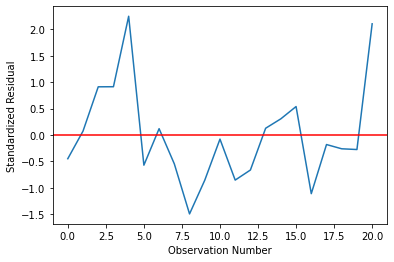

In [44]:
plt.plot(np.arange(len(dt_st)),model_3.resid_pearson)
plt.axhline(y=0,color='red')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual") 
plt.show()

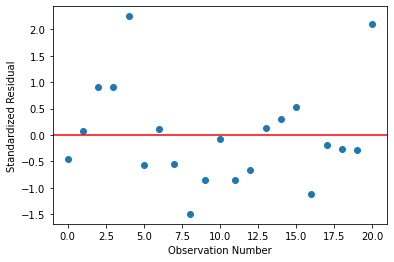

In [45]:
plt.scatter(np.arange(len(dt_st)),model_3.resid_pearson)
plt.axhline(y=0,color='red')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")
plt.show()

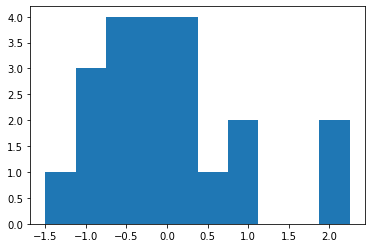

In [46]:
plt.hist(model_3.resid_pearson)
plt.show()

### Step-8 : Using the model for new data

In [47]:
#Predict for new data(Sorting time)
newdata=pd.Series([6,30,60])  

In [48]:
data_pred=pd.DataFrame(newdata,columns=['Sorting_Time'])
data_pred

,Sorting_Time
0,6
1,30
2,60


In [49]:
# Convert predicted log values into predicted values
pred_4log = model_3.predict(data_pred)
pred_4 = np.exp(pred_4log)
data_pred['Pred_Deliver_Time']=np.round(pred_4,2)
data_pred

,Sorting_Time,Pred_Deliver_Time
0,6,25269490.55
1,30,56.48
2,60,0.00


#### Hence the Linear Regression model gives accurate predictions